In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

both outlier detection and novelty detection are both used for anomaly detection. outlier detection is unsupervised because there is no label of the data. both normal and abnormal data points are mixed together. while novelty detection is semi-supervised. we have normal data points. given a new data point, we need to decide if this new point is from the same distribution or not. 

In [ ]:
#         Albert Thomas <albert.thomas@telecom-paristech.fr>
# License: BSD 3 clause

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

In [57]:
# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

In [6]:
n_outliers; n_inliers

45

255

In [7]:
# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

In [8]:
anomaly_algorithms

[('Robust covariance',
  EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                   store_precision=True, support_fraction=None)),
 ('One-Class SVM',
  OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
              max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
              verbose=False)),
 ('Isolation Forest',
  IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
                  max_features=1.0, max_samples='auto', n_estimators=100,
                  n_jobs=None, random_state=42, verbose=0, warm_start=False)),
 ('Local Outlier Factor',
  LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                     metric='minkowski', metric_params=None, n_jobs=None,
                     n_neighbors=35, novelty=False, p=2))]

In [10]:
# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

In [15]:
blobs_params
datasets[0].shape

{'random_state': 0, 'n_samples': 255, 'n_features': 2}

(255, 2)

<Figure size 792x900 with 0 Axes>

EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                 store_precision=True, support_fraction=None)

Text(0.5, 1.0, 'Robust covariance')

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.07s')

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

Text(0.5, 1.0, 'One-Class SVM')

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Isolation Forest')

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.23s')

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=35, novelty=False, p=2)

Text(0.5, 1.0, 'Local Outlier Factor')

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                 store_precision=True, support_fraction=None)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.10s')

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.25s')

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=35, novelty=False, p=2)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                 store_precision=True, support_fraction=None)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.07s')

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.24s')

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=35, novelty=False, p=2)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                 store_precision=True, support_fraction=None)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.07s')

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.24s')

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=35, novelty=False, p=2)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.03s')

EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                 store_precision=True, support_fraction=None)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.14s')

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.25s')

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=35, novelty=False, p=2)

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.99, 0.01, '.01s')

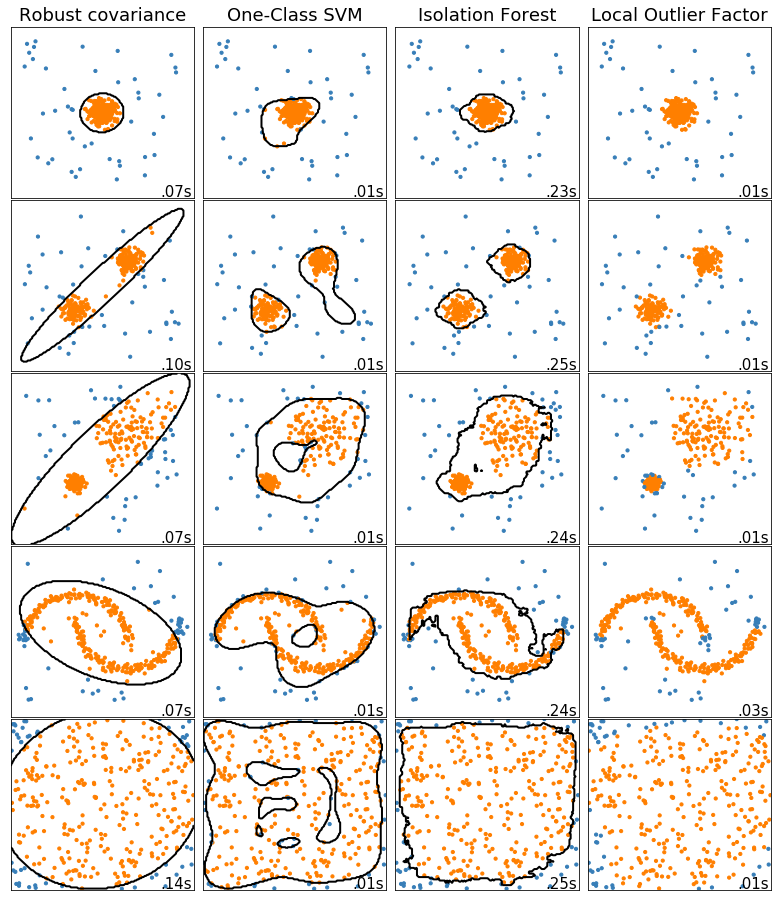

In [16]:
# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

array([[-0.5634129 , -0.36533888],
       [-0.18234677,  0.07835193]])

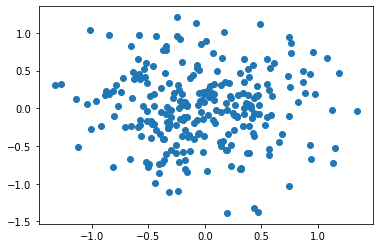

In [58]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
X = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,  **blobs_params)[0]

X[:2]

x, y = X[:, 0], X[:, 1]
plt.scatter(x, y)

# anomaly detection

# use 4 different anomaly models

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

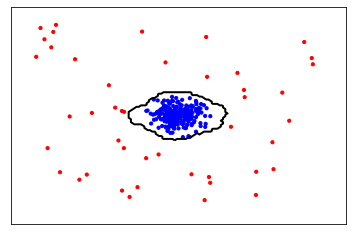

In [90]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
X = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,  **blobs_params)[0]

outliers_fraction = 0.15 # proportion of outliers in the dataset
# Add outliers
rng = np.random.RandomState(42)
X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
# model = EllipticEnvelope(contamination=outliers_fraction)
# model = svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)
model = IsolationForest(behaviour='new', contamination=outliers_fraction, random_state=42)
# model.fit(X)
y_pred = model.fit(X).predict(X)
# colors = np.array(['#377eb8', '#ff7f00'])
colors = np.array(['red', 'blue']) # red is outliers
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xticks(())
plt.yticks(())

In [51]:
model

(OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
             max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
             verbose=False),)

# local outlier factor

(-7, 7)

(-7, 7)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

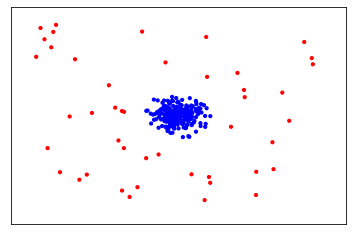

In [85]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
X = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,  **blobs_params)[0]

# Add outliers
rng = np.random.RandomState(42)
X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
model = LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                     metric='minkowski', metric_params=None, n_jobs=None,
                     n_neighbors=35, novelty=False, p=2)
# model.fit(X)
y_pred = model.fit_predict(X)
# colors = np.array(['#377eb8', '#ff7f00'])
colors = np.array(['red', 'blue']) # red is outliers
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xticks(())
plt.yticks(())


# novelty detection: from the same distribution?

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

Text(0.5, 1.0, 'Novelty Detection')

(-5.0, 5.0, -5.0, 5.0)

(-5, 5)

(-5, 5)

Text(0.5, 0, 'error train: 18/200 ; errors novel regular: 2/40 ; errors novel abnormal: 1/40')

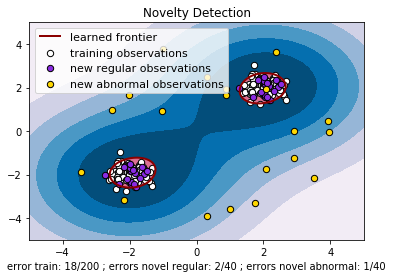

In [65]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [66]:
y_pred_test 

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [67]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1])